#Pandas 그룹화

#### 시각화 모듈 및 한글 처리

In [2]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [1]:
#시각화 모듈
import matplotlib
import matplotlib.pyplot as plt

#한글 폰트 사용 : vscode , window
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#마이너스 깨지는 경우 처리
matplotlib.rcParams['axes.unicode_minus'] = False 

#seaborn 라이브러리를 이용한 시각화
import seaborn as sns

#지도 시각화
#pip install folium
#https://github.com/southkorea/southkorea-maps 
import folium

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings(action='ignore') 

#### 부산시 탄소발생현황 및 구청 위치 정보 불러오기

In [26]:
df = pd.read_excel('/content/drive/My Drive/PythonWork/PythonBasic/05/부산탄소발생현황.xlsx')
df.head()

,연도,용도명,구명,동명,배출량원단위(전기),배출량원단위(가스),배출량원단위(지역난방)
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,-,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [11]:
df['용도명'].drop_duplicates()

0             공동주택
1                -
2             단독주택
12       제2종근린생활시설
33         문화및집회시설
39       제1종근린생활시설
47            종교시설
50            숙박시설
103         근린생활시설
104          노유자시설
116           운수시설
231           창고시설
237           업무시설
265        자동차관련시설
380         교육연구시설
518           판매시설
556           의료시설
765           운동시설
789      교육연구및복지시설
1416    위험물저장및처리시설
1437        방송통신시설
1616          위락시설
Name: 용도명, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연도            5000 non-null   int64  
 1   용도명           5000 non-null   object 
 2   구명            5000 non-null   object 
 3   동명            5000 non-null   object 
 4   배출량원단위(전기)    5000 non-null   float64
 5   배출량원단위(가스)    5000 non-null   float64
 6   배출량원단위(지역난방)  5000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 273.6+ KB


##### 용도명에 '-'있는 경우 NULL값 처리 

In [27]:
for idx in df.index :
    if df.loc[idx, '용도명'] == '-' : df.loc[idx, '용도명'] = None

##### 열명 변경하기

In [28]:
df.columns = ['연도', '용도명', '구명', '동명', '전기', '가스', '지역난방']

In [7]:
df.head(2)

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.0,0.0
1,2013,None,연제구,연산동,0.200,0.0,0.0


##### 결측치 데이터 처리하기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      5000 non-null   int64  
 1   용도명     4535 non-null   object 
 2   구명      5000 non-null   object 
 3   동명      5000 non-null   object 
 4   전기      5000 non-null   float64
 5   가스      5000 non-null   float64
 6   지역난방    5000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 273.6+ KB


In [18]:
#개수 구하기
df.count()

연도      5000
용도명     4535
구명      5000
동명      5000
전기      5000
가스      5000
지역난방    5000
dtype: int64

In [19]:
df.isna()

,연도,용도명,구명,동명,전기,가스,지역난방
0,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [9]:
#결측값의 수 확인
df.isna().sum()

연도        0
용도명     465
구명        0
동명        0
전기        0
가스        0
지역난방      0
dtype: int64

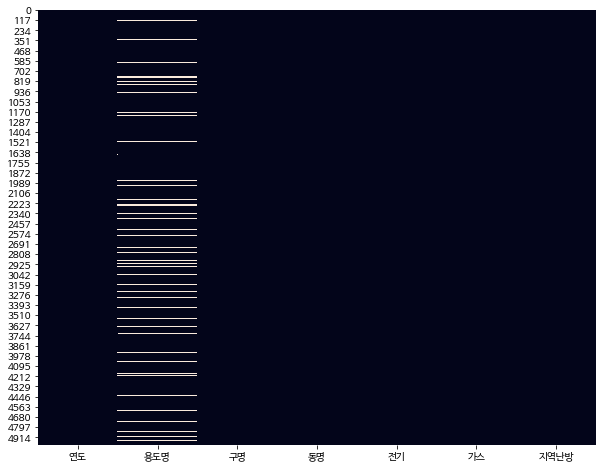

In [12]:
#결측치 시각화
plt.figure(figsize=(10,8))
sns.heatmap(df.isna(), cbar=False)
plt.show()

+ 결측치 데이타 모두 삭제 
 - .dropna(axis=0) : 행단위로 삭제
 - .dropna(axis=1) : 열단위로 삭제

In [11]:
#결측치 데이터 모두 삭제
df0 = df.dropna()
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4535 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      4535 non-null   int64  
 1   용도명     4535 non-null   object 
 2   구명      4535 non-null   object 
 3   동명      4535 non-null   object 
 4   전기      4535 non-null   float64
 5   가스      4535 non-null   float64
 6   지역난방    4535 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 283.4+ KB


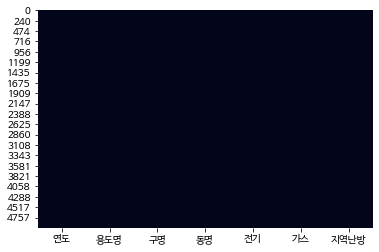

In [14]:
#결측치 시각화
sns.heatmap(df0.isna(), cbar=False)
plt.show()

In [15]:
df1 = df.dropna(axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      5000 non-null   int64  
 1   구명      5000 non-null   object 
 2   동명      5000 non-null   object 
 3   전기      5000 non-null   float64
 4   가스      5000 non-null   float64
 5   지역난방    5000 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 234.5+ KB


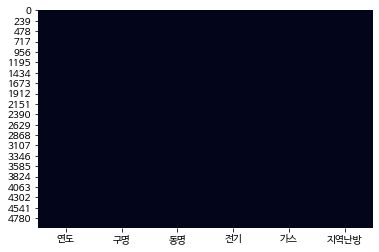

In [16]:
#결측치 시각화
sns.heatmap(df1.isna(), cbar=False)
plt.show()

+ 결치값 채우기
- .fillna(특정값) : 특정값으로 채우기
- .fillna(method='ffill') : 누락값이 나타나기 이전 값으로 채우기
- .fillna(method='bfill') : 누락값이 나타나기 이후 값으로 채우기

In [17]:
df['용도명'].value_counts()

단독주택          3018
제2종근린생활시설      462
공동주택           414
제1종근린생활시설      399
창고시설            33
교육연구시설          31
업무시설            29
노유자시설           29
숙박시설            27
자동차관련시설         16
종교시설            15
판매시설            14
위험물저장및처리시설      13
근린생활시설          10
문화및집회시설          6
운동시설             5
위락시설             4
의료시설             3
운수시설             3
교육연구및복지시설        3
방송통신시설           1
Name: 용도명, dtype: int64

In [18]:
dff1 = df.fillna('기타')
dff1['용도명'].value_counts()

단독주택          3018
기타             465
제2종근린생활시설      462
공동주택           414
제1종근린생활시설      399
창고시설            33
교육연구시설          31
업무시설            29
노유자시설           29
숙박시설            27
자동차관련시설         16
종교시설            15
판매시설            14
위험물저장및처리시설      13
근린생활시설          10
문화및집회시설          6
운동시설             5
위락시설             4
의료시설             3
교육연구및복지시설        3
운수시설             3
방송통신시설           1
Name: 용도명, dtype: int64

In [20]:
dff1.head()

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,기타,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [21]:
dff2 = df.fillna(method='ffill')
dff2.head()

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,공동주택,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [22]:
dff3 = df.fillna(method='bfill')
dff3.head()

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,단독주택,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [23]:
df[df['용도명'].isna()]

,연도,용도명,구명,동명,전기,가스,지역난방
1,2013,None,연제구,연산동,0.200,0.0,0.0
16,2013,None,영도구,영선동4가,9.223,0.0,0.0
25,2013,None,금정구,장전동,0.644,0.0,0.0
31,2013,None,중구,보수동2가,3.303,0.0,0.0
37,2013,None,사상구,감전동,3.528,0.0,0.0
...,...,...,...,...,...,...,...
4928,2011,None,해운대구,재송동,0.497,0.0,0.0
4949,2011,None,연제구,연산동,6.810,0.0,0.0
4956,2011,None,해운대구,중동,0.566,0.0,0.0
4958,2011,None,영도구,영선동3가,1.136,0.0,0.0


In [ ]:
df = df.fillna('단독주택')

In [29]:
df['용도명'] = df['용도명'].fillna('단독주택')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      5000 non-null   int64  
 1   용도명     5000 non-null   object 
 2   구명      5000 non-null   object 
 3   동명      5000 non-null   object 
 4   전기      5000 non-null   float64
 5   가스      5000 non-null   float64
 6   지역난방    5000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 273.6+ KB


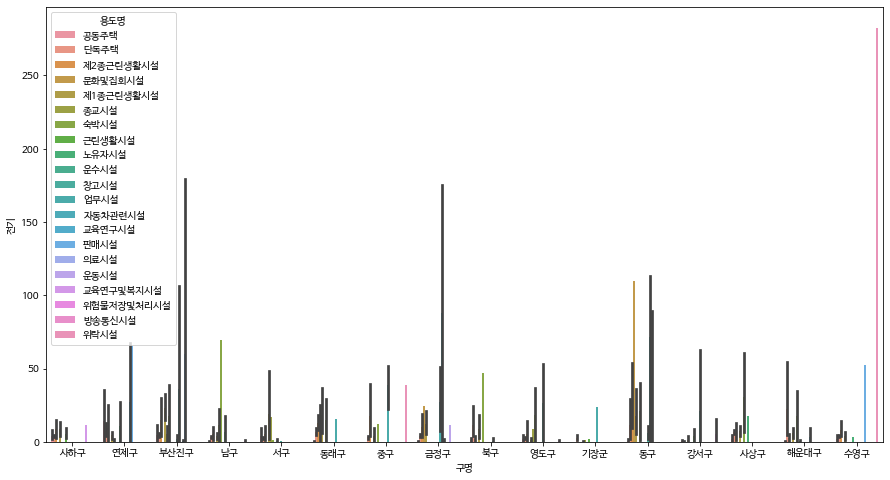

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='구명', y='전기', hue='용도명', data=df) # default : dodge=True
plt.show()

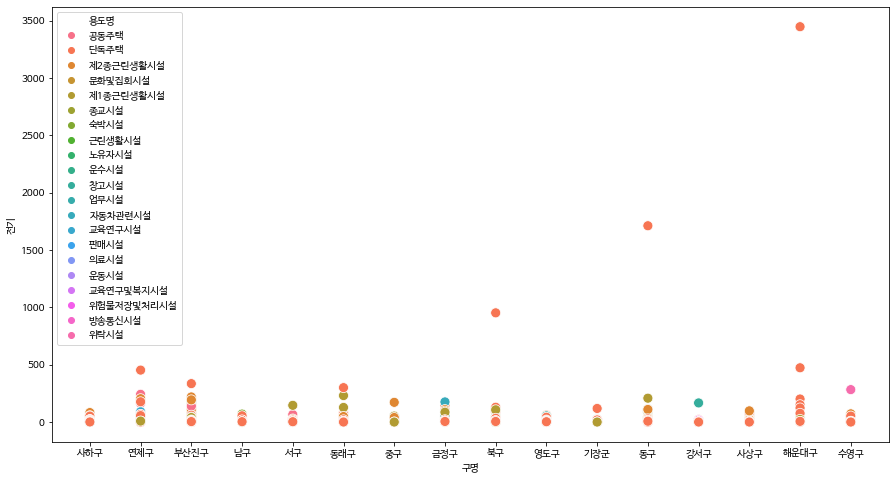

In [ ]:
# Scatter plot by Groups 
plt.figure(figsize=(15,8))
sns.scatterplot(x='구명',  
                y='전기', 
                hue='용도명', # different colors by group 
                s=100, # marker size
                data=df)
plt.show()
 

##### 연도별 데이터 생성하기

In [ ]:
df['연도'].value_counts()

2013    4000
2011    1000
Name: 연도, dtype: int64

In [30]:
df.head(2)

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.0,0.0
1,2013,단독주택,연제구,연산동,0.200,0.0,0.0


In [31]:
d2013 = df

In [35]:
for idx in d2013.index :
    if d2013.loc[idx, '연도'] != 2013 : d2013 = d2013.drop(index=idx)

In [36]:
d2013['연도'].value_counts()

2013    4000
Name: 연도, dtype: int64

In [37]:
d2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      4000 non-null   int64  
 1   용도명     4000 non-null   object 
 2   구명      4000 non-null   object 
 3   동명      4000 non-null   object 
 4   전기      4000 non-null   float64
 5   가스      4000 non-null   float64
 6   지역난방    4000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 250.0+ KB


In [38]:
df2013 = df[df['연도']==2013]
df2011 = df[df['연도']==2011]

In [39]:
df2013_1 = df.loc[df['연도']==2013,:]
df2011_1 = df.loc[df['연도']==2011,:]

In [40]:
df2013_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      4000 non-null   int64  
 1   용도명     4000 non-null   object 
 2   구명      4000 non-null   object 
 3   동명      4000 non-null   object 
 4   전기      4000 non-null   float64
 5   가스      4000 non-null   float64
 6   지역난방    4000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 250.0+ KB


In [ ]:
df2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      4000 non-null   int64  
 1   용도명     4000 non-null   object 
 2   구명      4000 non-null   object 
 3   동명      4000 non-null   object 
 4   전기      4000 non-null   float64
 5   가스      4000 non-null   float64
 6   지역난방    4000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 250.0+ KB


In [ ]:
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 4000 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      1000 non-null   int64  
 1   용도명     1000 non-null   object 
 2   구명      1000 non-null   object 
 3   동명      1000 non-null   object 
 4   전기      1000 non-null   float64
 5   가스      1000 non-null   float64
 6   지역난방    1000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 62.5+ KB


#### 데이터 결합하기
+ **pd.concat([df1, df2 ....])**
 - 기준 열(key column)을 사용하지 않고 단순히 데이터를 연결(concatenate)
 - Index를 기준으로 합침
 - 열방향으로 연결하기 : axis=1

In [41]:
df2013g = df2013.groupby('용도명')[['전기', '가스','지역난방']].mean()
df2013g.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 공동주택 to 판매시설
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전기      21 non-null     float64
 1   가스      21 non-null     float64
 2   지역난방    21 non-null     float64
dtypes: float64(3)
memory usage: 672.0+ bytes


In [42]:
df2013g.head(2)

,전기,가스,지역난방
용도명,,,
공동주택,2.991669,15.598607,13.137256
교육연구및복지시설,5.895000,0.595500,0.000000


In [ ]:
df2013g.index

Index(['공동주택', '교육연구및복지시설', '교육연구시설', '근린생활시설', '노유자시설', '단독주택', '문화및집회시설',
       '방송통신시설', '숙박시설', '업무시설', '운동시설', '운수시설', '위락시설', '위험물저장및처리시설', '의료시설',
       '자동차관련시설', '제1종근린생활시설', '제2종근린생활시설', '종교시설', '창고시설', '판매시설'],
      dtype='object', name='용도명')

In [43]:
df2011g = df2011.groupby('용도명')[['전기', '가스','지역난방']].mean()
df2011g.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 공동주택 to 판매시설
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전기      18 non-null     float64
 1   가스      18 non-null     float64
 2   지역난방    18 non-null     float64
dtypes: float64(3)
memory usage: 576.0+ bytes


In [44]:
df2011g.index

Index(['공동주택', '교육연구및복지시설', '교육연구시설', '근린생활시설', '노유자시설', '단독주택', '문화및집회시설',
       '숙박시설', '업무시설', '운수시설', '위락시설', '위험물저장및처리시설', '자동차관련시설', '제1종근린생활시설',
       '제2종근린생활시설', '종교시설', '창고시설', '판매시설'],
      dtype='object', name='용도명')

In [ ]:
set(df2013g.index) - set(df2011g.index)

{'방송통신시설', '운동시설', '의료시설'}

In [ ]:
df2013g.head()

,전기,가스,지역난방
용도명,,,
공동주택,2.991669,15.598607,13.137256
교육연구및복지시설,5.895000,0.595500,0.000000
교육연구시설,5.812000,27.107636,15.039682
근린생활시설,2.464429,3.725571,0.000000
노유자시설,2.116792,17.350625,6.172125


In [ ]:
df2011g.head()

,전기,가스,지역난방
용도명,,,
공동주택,1.045500,3.469776,1.062983
교육연구및복지시설,0.000000,0.000000,0.000000
교육연구시설,0.000000,22.010889,1.186778
근린생활시설,7.197667,2.683667,0.000000
노유자시설,7.318800,2.753600,24.518400


In [46]:
dfc1 = pd.concat([df2011g, df2013g], axis = 1)
dfc1

,전기,가스,지역난방,전기,가스,지역난방
공동주택,1.045500,3.469776,1.062983,2.991669,15.598607,13.137256
교육연구및복지시설,0.000000,0.000000,0.000000,5.895000,0.595500,0.000000
교육연구시설,0.000000,22.010889,1.186778,5.812000,27.107636,15.039682
근린생활시설,7.197667,2.683667,0.000000,2.464429,3.725571,0.000000
노유자시설,7.318800,2.753600,24.518400,2.116792,17.350625,6.172125
단독주택,3.970156,1.422435,0.174925,6.664488,1.306435,0.250687
문화및집회시설,0.000000,0.588000,0.000000,31.755000,0.354400,0.000000
숙박시설,0.000000,82.031333,0.000000,22.679792,92.410958,2.728042
업무시설,13.044250,5.205250,0.000000,27.669040,100.987160,7.977080
운수시설,0.000000,1189.722000,0.000000,0.000000,344.381500,0.000000


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text major ticklabel objects>)

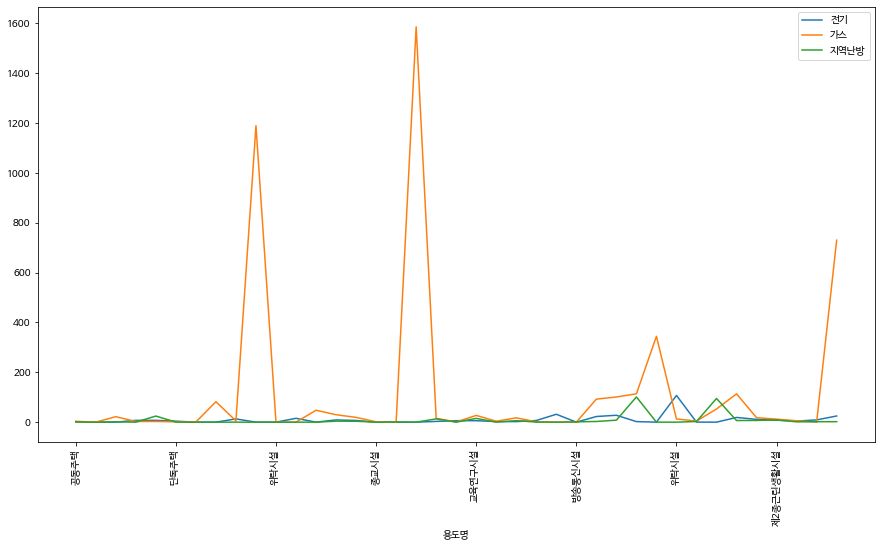

In [ ]:
dfc1.plot(figsize=(15,8)) 
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text major ticklabel objects>)

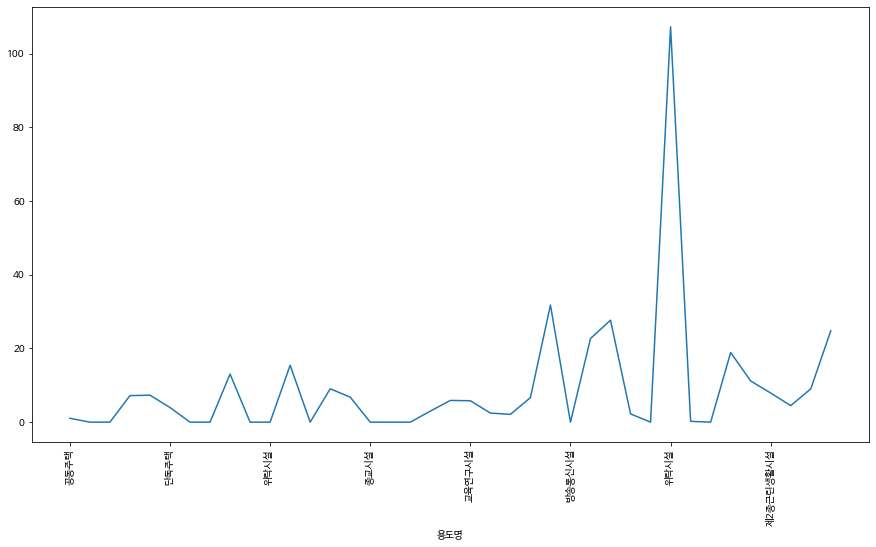

In [ ]:
dfc1['전기'].plot(figsize=(15,8)) 
plt.xticks(rotation=90)

In [ ]:
dfc2 = pd.concat([df2011g, df2013g], axis=1)
dfc2

,전기,가스,지역난방,전기,가스,지역난방
공동주택,1.045500,3.469776,1.062983,2.991669,15.598607,13.137256
교육연구및복지시설,0.000000,0.000000,0.000000,5.895000,0.595500,0.000000
교육연구시설,0.000000,22.010889,1.186778,5.812000,27.107636,15.039682
근린생활시설,7.197667,2.683667,0.000000,2.464429,3.725571,0.000000
노유자시설,7.318800,2.753600,24.518400,2.116792,17.350625,6.172125
단독주택,3.970156,1.422435,0.174925,6.664488,1.306435,0.250687
문화및집회시설,0.000000,0.588000,0.000000,31.755000,0.354400,0.000000
숙박시설,0.000000,82.031333,0.000000,22.679792,92.410958,2.728042
업무시설,13.044250,5.205250,0.000000,27.669040,100.987160,7.977080
운수시설,0.000000,1189.722000,0.000000,0.000000,344.381500,0.000000


##### 인덱스로 되어 있는 경우 

In [ ]:
df2013gg = df2013g.sort_values(by='전기').reset_index()
df2011gg = df2011g.reset_index()

In [ ]:
df2013gg.head()

,용도명,전기,가스,지역난방
0,의료시설,0.000000,52.776000,95.005667
1,운수시설,0.000000,344.381500,0.000000
2,방송통신시설,0.000000,0.000000,1.164000
3,위험물저장및처리시설,0.224333,4.404250,2.501917
4,노유자시설,2.116792,17.350625,6.172125


In [ ]:
df2011gg.head()

,용도명,전기,가스,지역난방
0,공동주택,1.045500,3.469776,1.062983
1,교육연구및복지시설,0.000000,0.000000,0.000000
2,교육연구시설,0.000000,22.010889,1.186778
3,근린생활시설,7.197667,2.683667,0.000000
4,노유자시설,7.318800,2.753600,24.518400


In [ ]:
dfc3 = pd.concat([df2013gg, df2011gg])
dfc3

,용도명,전기,가스,지역난방
0,의료시설,0.000000,52.776000,95.005667
1,운수시설,0.000000,344.381500,0.000000
2,방송통신시설,0.000000,0.000000,1.164000
3,위험물저장및처리시설,0.224333,4.404250,2.501917
4,노유자시설,2.116792,17.350625,6.172125
5,운동시설,2.242000,113.767600,101.083800
6,근린생활시설,2.464429,3.725571,0.000000
7,공동주택,2.991669,15.598607,13.137256
8,종교시설,4.485571,5.621857,1.301929
9,교육연구시설,5.812000,27.107636,15.039682


In [ ]:
dfc3 = pd.concat([df2013gg, df2011gg], ignore_index=True)
dfc3

,용도명,전기,가스,지역난방
0,의료시설,0.000000,52.776000,95.005667
1,운수시설,0.000000,344.381500,0.000000
2,방송통신시설,0.000000,0.000000,1.164000
3,위험물저장및처리시설,0.224333,4.404250,2.501917
4,노유자시설,2.116792,17.350625,6.172125
5,운동시설,2.242000,113.767600,101.083800
6,근린생활시설,2.464429,3.725571,0.000000
7,공동주택,2.991669,15.598607,13.137256
8,종교시설,4.485571,5.621857,1.301929
9,교육연구시설,5.812000,27.107636,15.039682


#### 데이터 결합하기
+ **pd.merge(df1, df2 , on='키열' , how='')**
 - 공통 열을 기준으로 데이터를 찾아서 합침
 - 기본적으로 양쪽 데이터프레임에 모두 키가 존재하는 데이터만 보여줌(inner join)
 - how옵션 : outer join
   - how = 'outer' : outer join 방식은 키 값이 한쪽에만 있어도 데이터 
   - how = 'left' : 첫번째 데이터프레임 키 값있으면 보여줌 
   - how = 'right' : 두번째 데이터프레임 키 값있으면 보여줌 

In [ ]:
df2011gg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   용도명     18 non-null     object 
 1   전기      18 non-null     float64
 2   가스      18 non-null     float64
 3   지역난방    18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 704.0+ bytes


In [ ]:
df2011gg.head()

,용도명,전기,가스,지역난방
0,공동주택,1.045500,3.469776,1.062983
1,교육연구및복지시설,0.000000,0.000000,0.000000
2,교육연구시설,0.000000,22.010889,1.186778
3,근린생활시설,7.197667,2.683667,0.000000
4,노유자시설,7.318800,2.753600,24.518400


In [ ]:
df2013gg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   용도명     21 non-null     object 
 1   전기      21 non-null     float64
 2   가스      21 non-null     float64
 3   지역난방    21 non-null     float64
dtypes: float64(3), object(1)
memory usage: 800.0+ bytes


In [ ]:
df2013gg.head()

,용도명,전기,가스,지역난방
0,의료시설,0.000000,52.776000,95.005667
1,운수시설,0.000000,344.381500,0.000000
2,방송통신시설,0.000000,0.000000,1.164000
3,위험물저장및처리시설,0.224333,4.404250,2.501917
4,노유자시설,2.116792,17.350625,6.172125


In [ ]:
dfgg = pd.merge(df2011gg, df2013gg, on='용도명')
dfgg

,용도명,전기_x,가스_x,지역난방_x,전기_y,가스_y,지역난방_y
0,공동주택,1.045500,3.469776,1.062983,2.991669,15.598607,13.137256
1,교육연구및복지시설,0.000000,0.000000,0.000000,5.895000,0.595500,0.000000
2,교육연구시설,0.000000,22.010889,1.186778,5.812000,27.107636,15.039682
3,근린생활시설,7.197667,2.683667,0.000000,2.464429,3.725571,0.000000
4,노유자시설,7.318800,2.753600,24.518400,2.116792,17.350625,6.172125
5,단독주택,3.970156,1.422435,0.174925,6.664488,1.306435,0.250687
6,문화및집회시설,0.000000,0.588000,0.000000,31.755000,0.354400,0.000000
7,숙박시설,0.000000,82.031333,0.000000,22.679792,92.410958,2.728042
8,업무시설,13.044250,5.205250,0.000000,27.669040,100.987160,7.977080
9,운수시설,0.000000,1189.722000,0.000000,0.000000,344.381500,0.000000


In [ ]:
dfgg1 = pd.merge(df2011gg, df2013gg, on='용도명', how='outer')
dfgg1

,용도명,전기_x,가스_x,지역난방_x,전기_y,가스_y,지역난방_y
0,공동주택,1.045500,3.469776,1.062983,2.991669,15.598607,13.137256
1,교육연구및복지시설,0.000000,0.000000,0.000000,5.895000,0.595500,0.000000
2,교육연구시설,0.000000,22.010889,1.186778,5.812000,27.107636,15.039682
3,근린생활시설,7.197667,2.683667,0.000000,2.464429,3.725571,0.000000
4,노유자시설,7.318800,2.753600,24.518400,2.116792,17.350625,6.172125
5,단독주택,3.970156,1.422435,0.174925,6.664488,1.306435,0.250687
6,문화및집회시설,0.000000,0.588000,0.000000,31.755000,0.354400,0.000000
7,숙박시설,0.000000,82.031333,0.000000,22.679792,92.410958,2.728042
8,업무시설,13.044250,5.205250,0.000000,27.669040,100.987160,7.977080
9,운수시설,0.000000,1189.722000,0.000000,0.000000,344.381500,0.000000


In [ ]:
dfgg2 = pd.merge(df2011gg, df2013gg, on='용도명', how='left')
dfgg2

,용도명,전기_x,가스_x,지역난방_x,전기_y,가스_y,지역난방_y
0,공동주택,1.045500,3.469776,1.062983,2.991669,15.598607,13.137256
1,교육연구및복지시설,0.000000,0.000000,0.000000,5.895000,0.595500,0.000000
2,교육연구시설,0.000000,22.010889,1.186778,5.812000,27.107636,15.039682
3,근린생활시설,7.197667,2.683667,0.000000,2.464429,3.725571,0.000000
4,노유자시설,7.318800,2.753600,24.518400,2.116792,17.350625,6.172125
5,단독주택,3.970156,1.422435,0.174925,6.664488,1.306435,0.250687
6,문화및집회시설,0.000000,0.588000,0.000000,31.755000,0.354400,0.000000
7,숙박시설,0.000000,82.031333,0.000000,22.679792,92.410958,2.728042
8,업무시설,13.044250,5.205250,0.000000,27.669040,100.987160,7.977080
9,운수시설,0.000000,1189.722000,0.000000,0.000000,344.381500,0.000000


In [ ]:
dfgg3 = pd.merge(df2011gg, df2013gg, on='용도명', how='right')
dfgg3

,용도명,전기_x,가스_x,지역난방_x,전기_y,가스_y,지역난방_y
0,공동주택,1.045500,3.469776,1.062983,2.991669,15.598607,13.137256
1,교육연구및복지시설,0.000000,0.000000,0.000000,5.895000,0.595500,0.000000
2,교육연구시설,0.000000,22.010889,1.186778,5.812000,27.107636,15.039682
3,근린생활시설,7.197667,2.683667,0.000000,2.464429,3.725571,0.000000
4,노유자시설,7.318800,2.753600,24.518400,2.116792,17.350625,6.172125
5,단독주택,3.970156,1.422435,0.174925,6.664488,1.306435,0.250687
6,문화및집회시설,0.000000,0.588000,0.000000,31.755000,0.354400,0.000000
7,숙박시설,0.000000,82.031333,0.000000,22.679792,92.410958,2.728042
8,업무시설,13.044250,5.205250,0.000000,27.669040,100.987160,7.977080
9,운수시설,0.000000,1189.722000,0.000000,0.000000,344.381500,0.000000


#### 데이터 재구조화
+ **pd.pivot_table(data, index='', columns='', values='')**
 - index :  행 인덱스로 사용할 열 이름
 - columns : 열 인덱스로 사용할 열 이름
 - values: 데이터로 사용할 열 이름

In [ ]:
df.head()

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,단독주택,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [52]:
dfg = df.groupby(['용도명', '구명'])['전기','가스','지역난방'].mean()
dfg.head()

전기         가스       지역난방
용도명  구명                                 
공동주택 금정구  0.336553   6.064842  18.192553
     기장군  0.000000  56.087333   0.055133
     남구   0.109594   0.802531   0.851688
     동구   0.660231   1.125462   1.318462
     동래구  0.433405   7.975595  27.512784

In [53]:
dfg = dfg.reset_index()
dfg.head()

,용도명,구명,전기,가스,지역난방
0,공동주택,금정구,0.336553,6.064842,18.192553
1,공동주택,기장군,0.000000,56.087333,0.055133
2,공동주택,남구,0.109594,0.802531,0.851688
3,공동주택,동구,0.660231,1.125462,1.318462
4,공동주택,동래구,0.433405,7.975595,27.512784


In [58]:
dfg['용도명'].value_counts().count()

21

In [59]:
dfg['구명'].value_counts().count()

16

In [ ]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   용도명     181 non-null    object 
 1   구명      181 non-null    object 
 2   전기      181 non-null    float64
 3   가스      181 non-null    float64
 4   지역난방    181 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.2+ KB


In [ ]:
dfg[dfg['구명']=='강서구'][dfg['용도명'] == '근린생활시설']

,용도명,구명,전기,가스,지역난방
28,근린생활시설,강서구,4.1848,2.3638,0.0


In [ ]:
dfpivot = pd.pivot_table(df, index='용도명', columns='구명', values='전기')
dfpivot 

구명,강서구,금정구,기장군,남구,동구,동래구,부산진구,북구,사상구,사하구,서구,수영구,연제구,영도구,중구,해운대구
용도명,,,,,,,,,,,,,,,,
공동주택,NaN,0.336553,0.000000,0.109594,0.660231,0.433405,4.481500,1.112903,1.577040,4.262864,4.048840,1.656464,14.484233,1.927071,0.000000,0.286036
교육연구및복지시설,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.790000,NaN,NaN,0.000000,NaN,NaN,NaN
교육연구시설,0.000000,0.725250,NaN,0.000000,NaN,NaN,0.485500,0.000000,0.000000,0.000000,NaN,NaN,27.184250,0.000000,NaN,3.085500
근린생활시설,4.184800,NaN,2.173000,NaN,NaN,NaN,NaN,NaN,NaN,5.249000,NaN,NaN,NaN,NaN,NaN,0.000000
노유자시설,NaN,0.000000,NaN,6.374000,0.000000,0.000000,0.000000,0.000000,17.613000,NaN,0.829500,3.519000,10.930250,0.000000,0.000000,0.440750
단독주택,0.875393,4.298181,2.771657,3.312822,11.487000,6.428944,4.314801,11.346530,6.626797,3.651944,2.473039,3.909167,7.275655,2.639535,3.004173,22.499601
문화및집회시설,0.000000,24.166000,NaN,NaN,109.832000,12.388500,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
방송통신시설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
숙박시설,NaN,0.000000,NaN,69.325000,20.718500,14.741000,17.482333,46.954000,30.754000,0.000000,1.485000,NaN,0.000000,18.474000,11.822000,17.472750


In [ ]:
dfpivot.index

Index(['공동주택', '교육연구및복지시설', '교육연구시설', '근린생활시설', '노유자시설', '단독주택', '문화및집회시설',
       '방송통신시설', '숙박시설', '업무시설', '운동시설', '운수시설', '위락시설', '위험물저장및처리시설', '의료시설',
       '자동차관련시설', '제1종근린생활시설', '제2종근린생활시설', '종교시설', '창고시설', '판매시설'],
      dtype='object', name='용도명')

In [ ]:
dfpivot.isna().sum()

구명
강서구      9
금정구      9
기장군     12
남구       9
동구      11
동래구      9
부산진구     6
북구      10
사상구      9
사하구      9
서구      11
수영구     13
연제구      7
영도구     10
중구      13
해운대구     8
dtype: int64

In [ ]:
dfpivot = dfpivot.fillna(0)

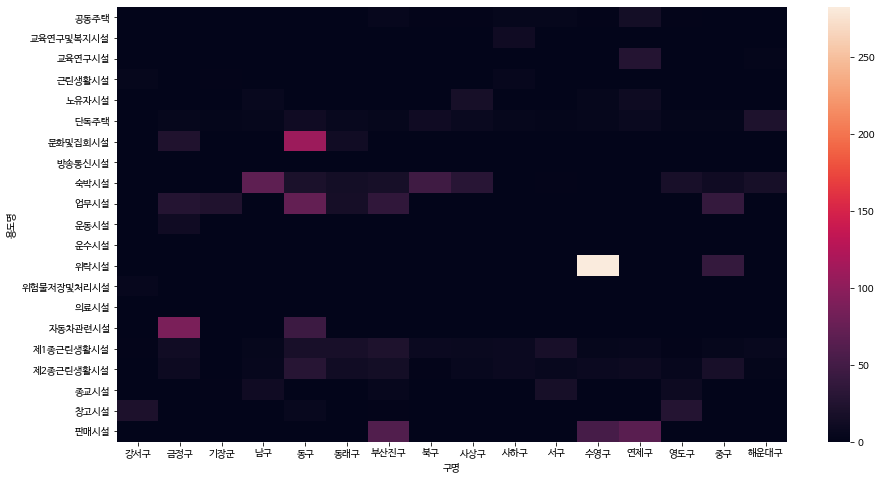

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dfpivot, cbar=True)
plt.show()


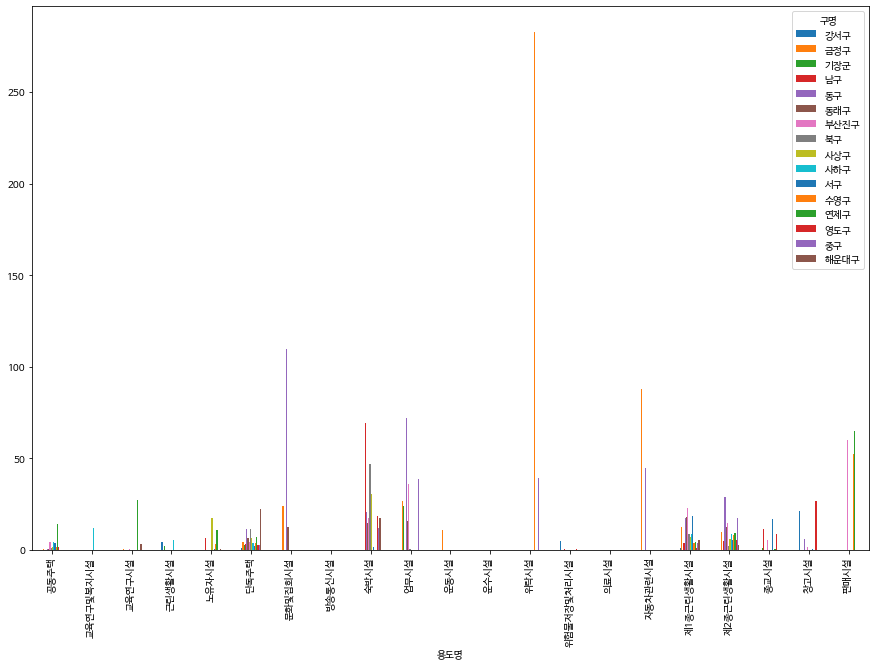

In [ ]:
dfpivot.plot(kind='bar', figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

#### 해결문제


---
해결문제 ) 구별 동별 탄소 배출량을 추출하시오.
+ 구별 배출가스 현황을 그래프로 그리시오.
+ 구별 동별의 배출가스 현황을 그래프로 그리시오.
---




In [ ]:
df.head()

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,단독주택,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [62]:
df['합계'] = df[['전기','가스','지역난방']].sum(axis=1)
df.head()

,연도,용도명,구명,동명,전기,가스,지역난방,합계
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0,3.782
1,2013,단독주택,연제구,연산동,0.200,0.000,0.0,0.200
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0,15.977
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0,3.512
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0,5.569


In [65]:
gu = df.groupby(['구명', '동명'])['전기','가스','지역난방','합계'].mean()

In [66]:
gu.head()

전기        가스      지역난방         합계
구명  동명                                           
강서구 강동동   1.163788  5.378061  4.383606  10.925455
    녹산동   0.000000  0.247375  2.162750   2.410125
    눌차동   0.000000  1.326667  0.000000   1.326667
    대저1동  6.072727  2.317121  2.563121  10.952970
    대저2동  0.921568  2.239027  9.658324  12.818919

In [67]:
gu = gu.reset_index()
gu.head()

,구명,동명,전기,가스,지역난방,합계
0,강서구,강동동,1.163788,5.378061,4.383606,10.925455
1,강서구,녹산동,0.000000,0.247375,2.162750,2.410125
2,강서구,눌차동,0.000000,1.326667,0.000000,1.326667
3,강서구,대저1동,6.072727,2.317121,2.563121,10.952970
4,강서구,대저2동,0.921568,2.239027,9.658324,12.818919


In [ ]:
gu1 = gu.groupby('구명')[['전기', '가스', '지역난방']].mean()
gu1.head()

,전기,가스,지역난방
구명,,,
강서구,0.596486,1.208026,7.477652
금정구,6.691793,3.524763,1.389614
기장군,2.569542,5.109446,1.467149
남구,2.806693,3.234918,1.089275
동구,14.492319,1.668143,0.533875


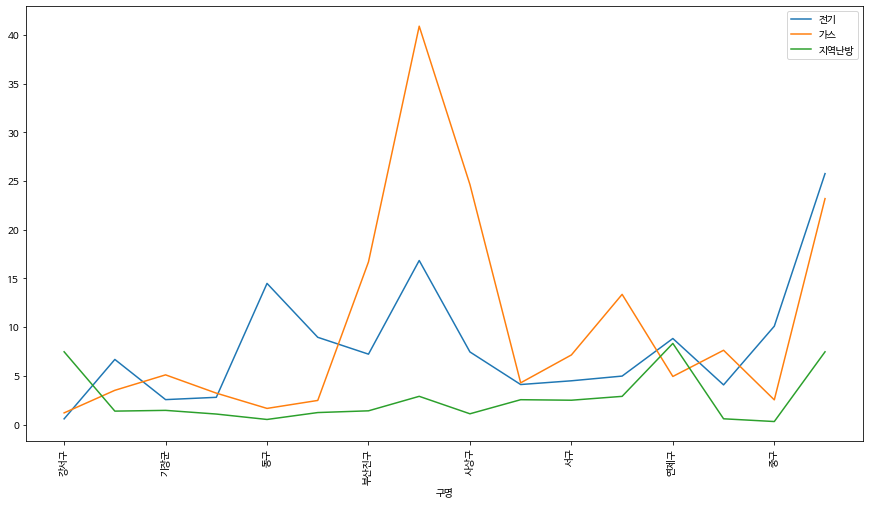

In [ ]:
gu1.plot(figsize=(15,8)) 
plt.xticks(rotation=90)
plt.show()

In [ ]:
gu[gu['구명']=='영도구']

In [88]:
def dong(gname) :
    gu_dong = gu[gu['구명']==gname][['동명','합계']]
    gu_dong = gu_dong.set_index('동명')
    gu_dong.plot(kind='barh')
    plt.title(gname + '배출량')
    plt.show()

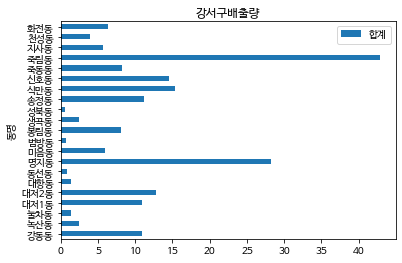

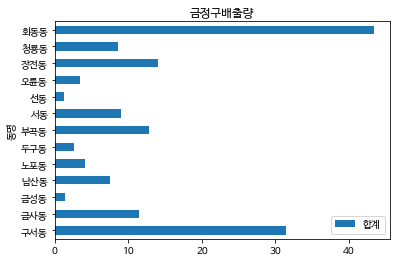

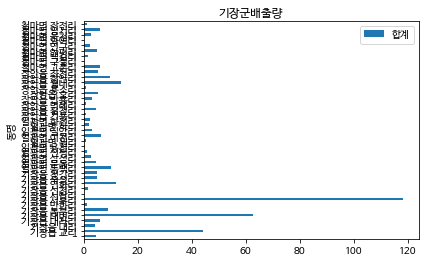

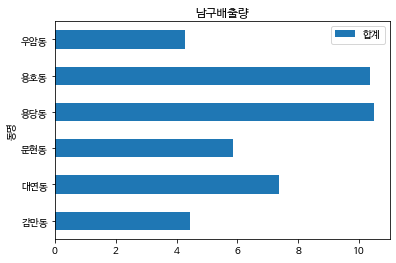

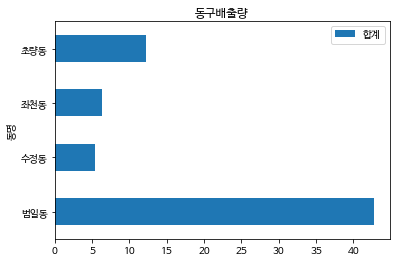

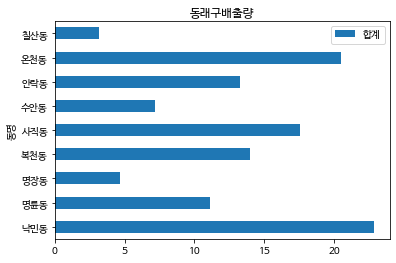

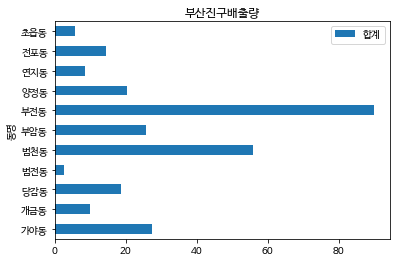

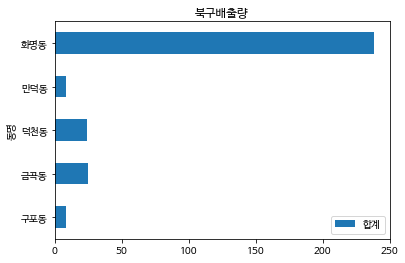

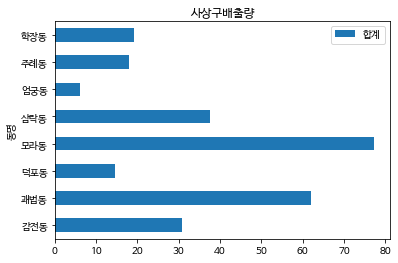

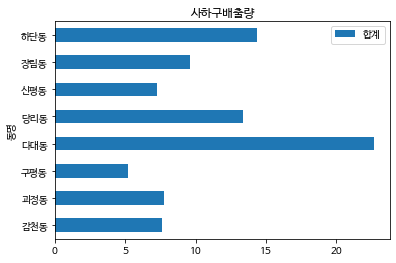

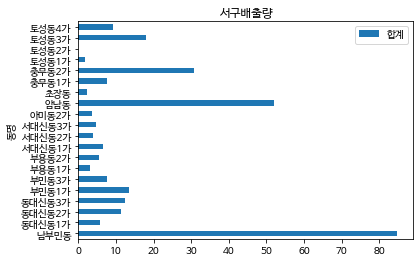

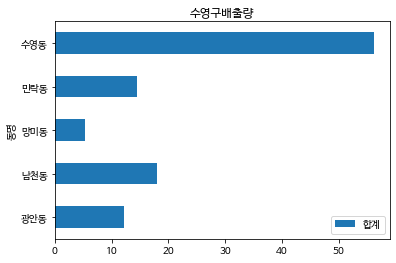

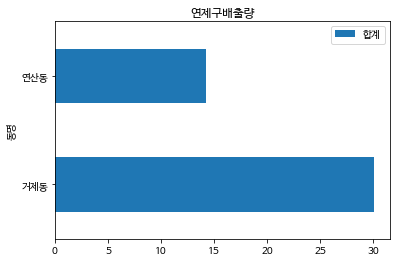

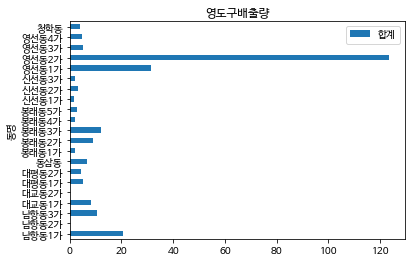

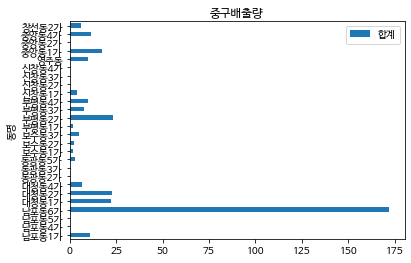

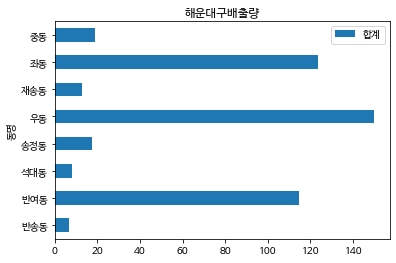

In [89]:
for item in gu['구명'].drop_duplicates():
    dong(item)

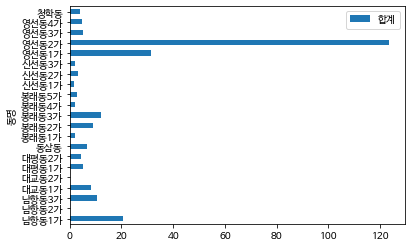

In [ ]:
def gu_graph(gname):
    gdf = gu[gu['구명']==gname][['동명', '합계']]
    gdf.columns = ['동명', '배출량']
    gdf = gdf.sort_values('배출량')
    plt.figure(figsize=(10,6))
    sns.barplot(x="배출량", y="동명",data=gdf)
    plt.title(gname + '탄소 배출량')
    plt.show()

In [ ]:
gs = pd.DataFrame(gu['구명'].drop_duplicates())

In [ ]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 200
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구명      16 non-null     object
dtypes: object(1)
memory usage: 256.0+ bytes


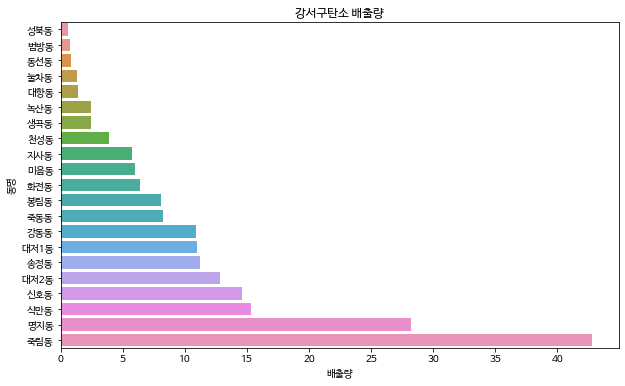

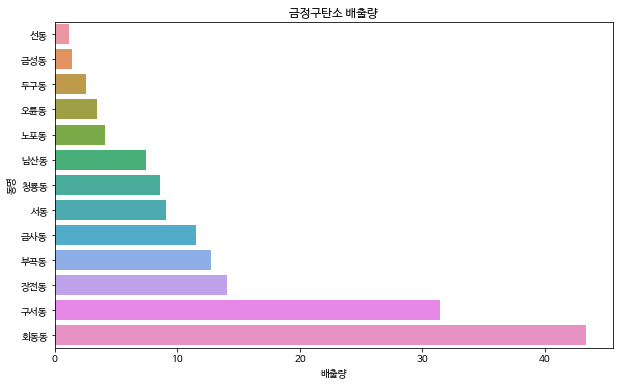

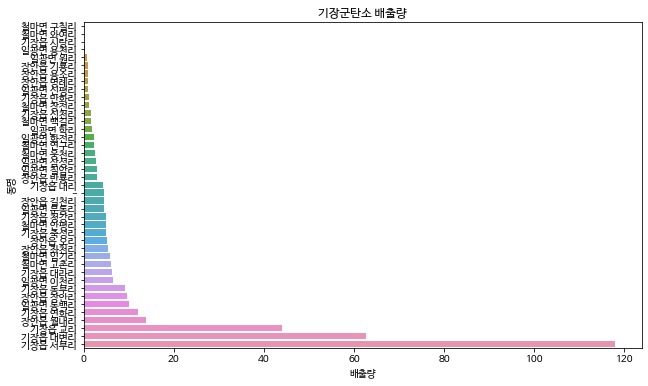

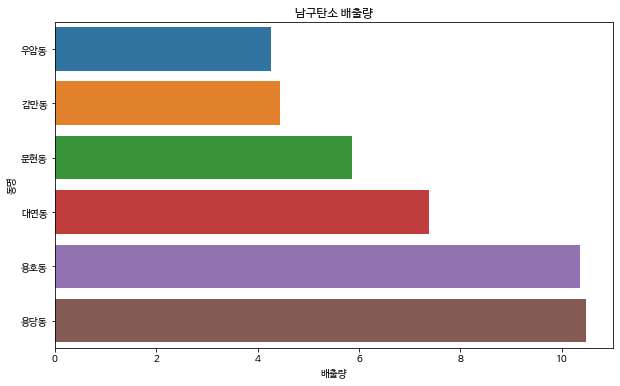

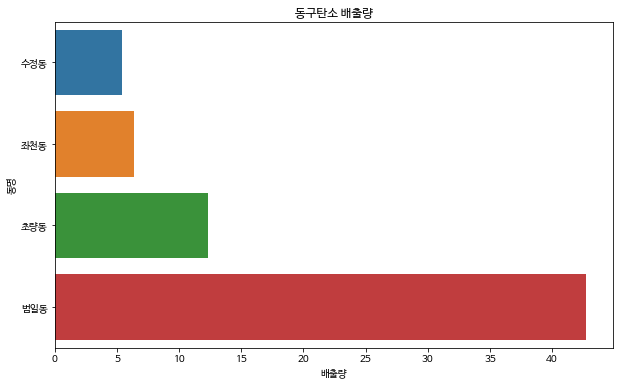

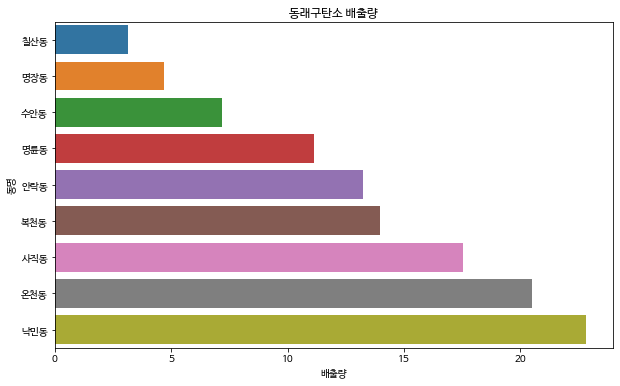

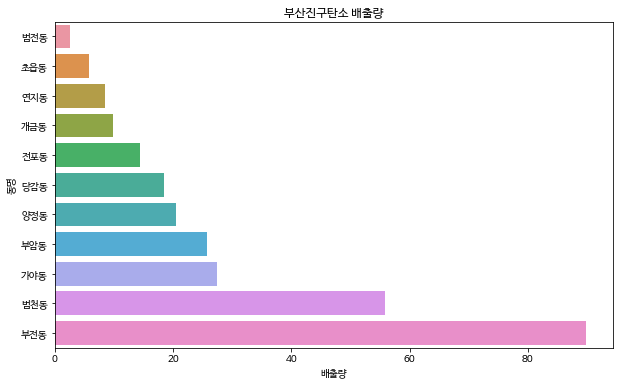

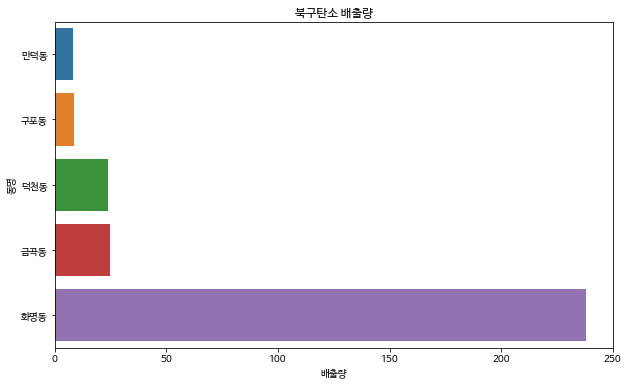

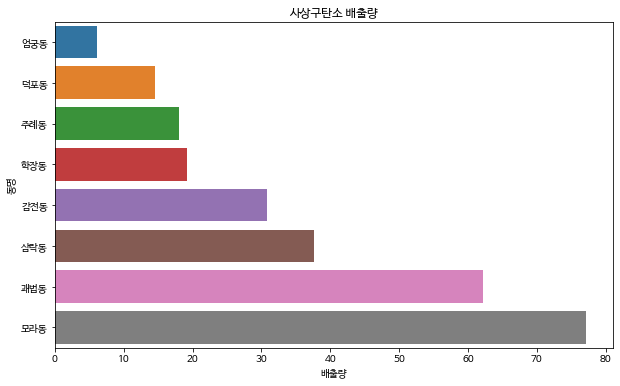

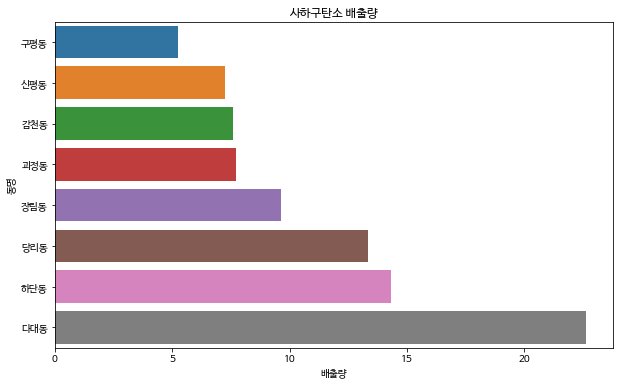

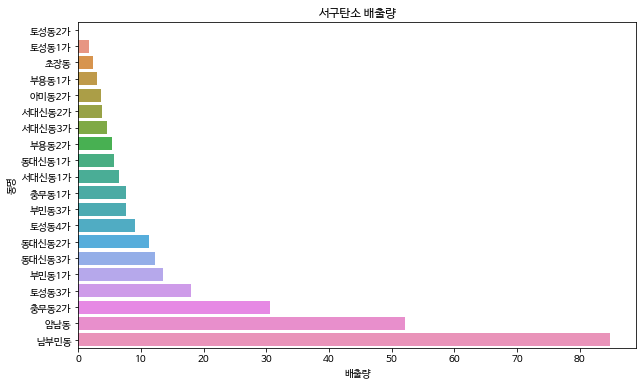

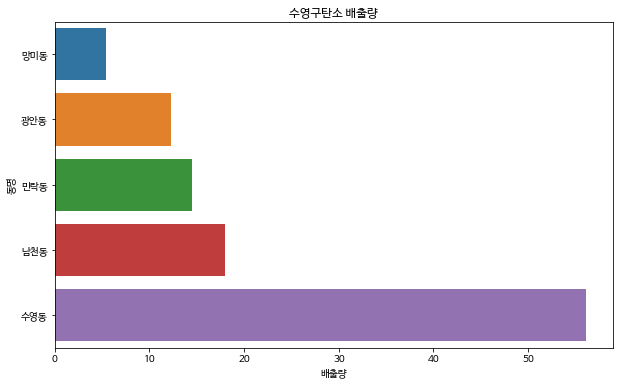

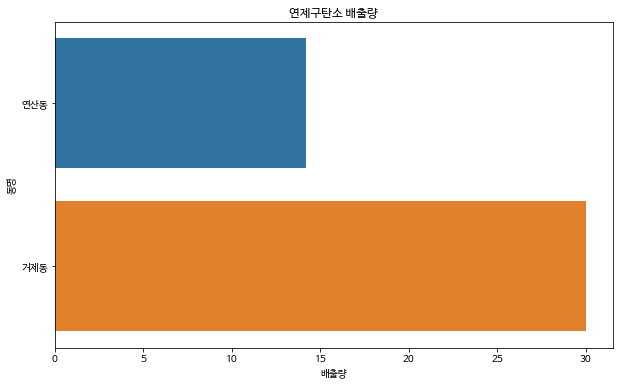

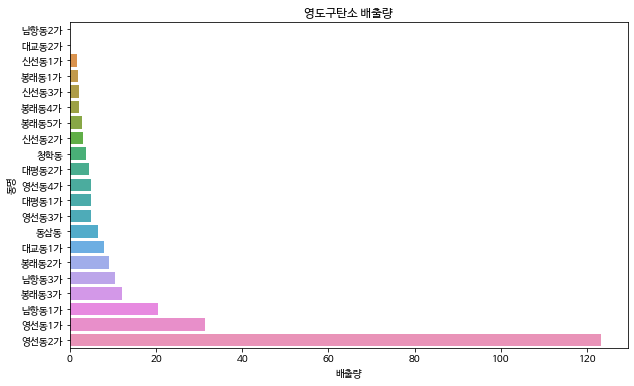

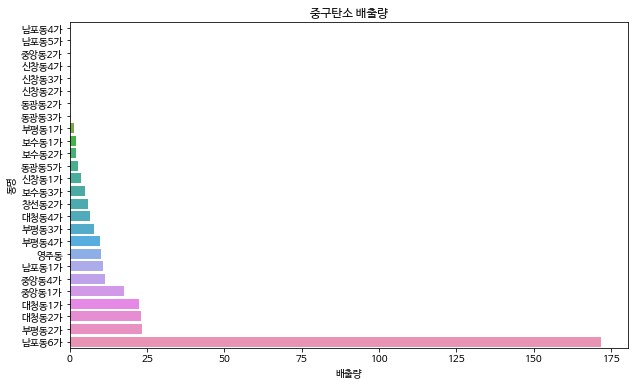

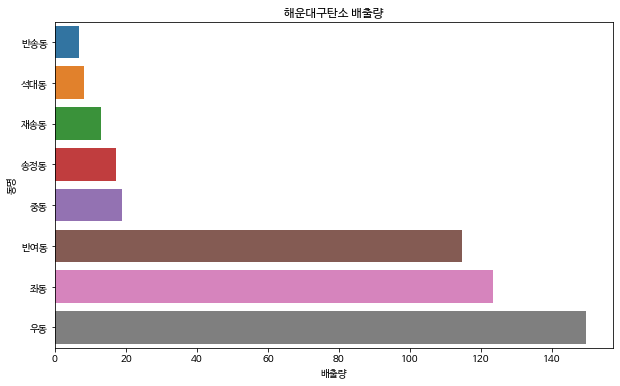

In [ ]:
for idx in gs.index:
    gu_graph(gs.loc[idx,'구명'])